In [74]:
import pandas as pd
from datetime import datetime
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [75]:
data = pd.read_csv('taxi.csv')
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
1,id1752141,1,2016-05-03 18:20:59,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
3,id0227018,2,2016-01-11 20:07:13,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433
4,id2263790,2,2016-01-22 00:31:59,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529
...,...,...,...,...,...,...,...,...,...,...,...
99995,id1085998,2,2016-05-10 17:09:15,2016-05-10 17:28:13,1,-73.990089,40.751648,-73.981262,40.784264,N,1138
99996,id1119642,1,2016-02-13 23:25:04,2016-02-13 23:32:14,1,-73.985161,40.774433,-73.976547,40.790916,N,430
99997,id3739873,2,2016-04-19 17:22:31,2016-04-19 17:43:12,1,-73.975052,40.756241,-73.984818,40.769341,N,1241
99998,id1863124,2,2016-06-22 20:50:36,2016-06-22 21:04:30,1,-73.983192,40.744656,-73.950607,40.783321,N,834


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  100000 non-null  object 
 1   vendor_id           100000 non-null  int64  
 2   pickup_datetime     100000 non-null  object 
 3   dropoff_datetime    100000 non-null  object 
 4   passenger_count     100000 non-null  int64  
 5   pickup_longitude    100000 non-null  float64
 6   pickup_latitude     100000 non-null  float64
 7   dropoff_longitude   100000 non-null  float64
 8   dropoff_latitude    100000 non-null  float64
 9   store_and_fwd_flag  100000 non-null  object 
 10  trip_duration       100000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 8.4+ MB


In [77]:
#1 
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100000 non-null  object        
 1   vendor_id           100000 non-null  int64         
 2   pickup_datetime     100000 non-null  datetime64[ns]
 3   dropoff_datetime    100000 non-null  object        
 4   passenger_count     100000 non-null  int64         
 5   pickup_longitude    100000 non-null  float64       
 6   pickup_latitude     100000 non-null  float64       
 7   dropoff_longitude   100000 non-null  float64       
 8   dropoff_latitude    100000 non-null  float64       
 9   store_and_fwd_flag  100000 non-null  object        
 10  trip_duration       100000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 8.4+ MB


In [79]:
data1 = data[data['pickup_datetime'].dt.weekday.isin([5,6])] 
data1
#поездки только за выходные


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
5,id3105911,2,2016-03-12 11:45:30,2016-03-12 12:06:40,5,-73.989853,40.762321,-73.990356,40.719570,N,1270
6,id3638379,1,2016-02-27 19:24:57,2016-02-27 20:02:12,1,-73.981590,40.773579,-73.985977,40.726574,N,2235
9,id0280140,1,2016-04-09 23:33:12,2016-04-09 23:44:10,1,-73.989906,40.756668,-73.987427,40.768623,N,658
...,...,...,...,...,...,...,...,...,...,...,...
99988,id2622579,2,2016-03-06 14:12:16,2016-03-06 14:21:13,1,-73.988487,40.759212,-74.003883,40.747547,N,537
99990,id3919255,1,2016-04-10 10:14:43,2016-04-10 10:22:44,2,-73.961388,40.774467,-73.969559,40.760349,N,481
99992,id2189210,2,2016-01-23 05:36:06,2016-01-23 05:53:38,1,-73.996338,40.763706,-73.948715,40.815403,N,1052
99994,id0959872,2,2016-03-27 14:39:03,2016-03-27 14:43:05,6,-73.984451,40.768520,-73.973640,40.763699,N,242


In [80]:
data1['month'] = data1['pickup_datetime'].dt.month_name().tolist()
data1





C:\Users\pasha\AppData\Local\Temp\ipykernel_17588\2544999376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'] = data1['pickup_datetime'].dt.month_name().tolist()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557,January
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445,June
5,id3105911,2,2016-03-12 11:45:30,2016-03-12 12:06:40,5,-73.989853,40.762321,-73.990356,40.719570,N,1270,March
6,id3638379,1,2016-02-27 19:24:57,2016-02-27 20:02:12,1,-73.981590,40.773579,-73.985977,40.726574,N,2235,February
9,id0280140,1,2016-04-09 23:33:12,2016-04-09 23:44:10,1,-73.989906,40.756668,-73.987427,40.768623,N,658,April
...,...,...,...,...,...,...,...,...,...,...,...,...
99988,id2622579,2,2016-03-06 14:12:16,2016-03-06 14:21:13,1,-73.988487,40.759212,-74.003883,40.747547,N,537,March
99990,id3919255,1,2016-04-10 10:14:43,2016-04-10 10:22:44,2,-73.961388,40.774467,-73.969559,40.760349,N,481,April
99992,id2189210,2,2016-01-23 05:36:06,2016-01-23 05:53:38,1,-73.996338,40.763706,-73.948715,40.815403,N,1052,January
99994,id0959872,2,2016-03-27 14:39:03,2016-03-27 14:43:05,6,-73.984451,40.768520,-73.973640,40.763699,N,242,March


In [81]:
data1['month'].value_counts()
#общее количество поездок по месяцам


April       5279
May         4977
March       4694
February    4650
January     4610
June        4201
Name: month, dtype: int64

In [82]:
data1


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557,January
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445,June
5,id3105911,2,2016-03-12 11:45:30,2016-03-12 12:06:40,5,-73.989853,40.762321,-73.990356,40.719570,N,1270,March
6,id3638379,1,2016-02-27 19:24:57,2016-02-27 20:02:12,1,-73.981590,40.773579,-73.985977,40.726574,N,2235,February
9,id0280140,1,2016-04-09 23:33:12,2016-04-09 23:44:10,1,-73.989906,40.756668,-73.987427,40.768623,N,658,April
...,...,...,...,...,...,...,...,...,...,...,...,...
99988,id2622579,2,2016-03-06 14:12:16,2016-03-06 14:21:13,1,-73.988487,40.759212,-74.003883,40.747547,N,537,March
99990,id3919255,1,2016-04-10 10:14:43,2016-04-10 10:22:44,2,-73.961388,40.774467,-73.969559,40.760349,N,481,April
99992,id2189210,2,2016-01-23 05:36:06,2016-01-23 05:53:38,1,-73.996338,40.763706,-73.948715,40.815403,N,1052,January
99994,id0959872,2,2016-03-27 14:39:03,2016-03-27 14:43:05,6,-73.984451,40.768520,-73.973640,40.763699,N,242,March


In [83]:
#2 Создаем df, состоящий из 10000 строк и 5 колонок
n = 10000
loc_norm = 1440
scale_norm = 200
stroka = "1234567890abcdefghigk"

column_id = [''.join(random.choices(stroka,k = len(stroka))) for i in range(n)]#user_id
column_number = [random.randint(1, 9) for i in range(n)]#номер заказа
column_time = np.random.normal(loc = loc_norm,scale = scale_norm,size = n)#время доставки 
column_price = np.random.exponential(scale = 1,size = n)#стоимость заказа
values = [1,2,3,4,5]
data = random.choices(values, weights = [0.35, 0.25, 0.2, 0.15, 0.05], k = n)#день заказа

all_columns = {'user-id':column_id, 'number':column_number, 'time':column_time, 'price':column_price, 'retention':data}
df = pd.DataFrame(all_columns)

df

,user-id,number,time,price,retention
0,ge49g18d102gcgc59f198,5,1324.994587,2.038510,2
1,fg86cae79echc1i034hf6,1,1268.532556,1.859879,3
2,3fdb4e86g8acg1kk4i225,1,1521.241210,0.097210,2
3,i2bgck8e4dfgkg9ghdff2,4,1707.343809,0.651864,5
4,e3bi15c3f0gc50ah1836e,9,1658.876673,0.319246,1
...,...,...,...,...,...
9995,i80gdei98d36fd11gd9e6,3,1520.067263,0.187436,4
9996,4aihkd682gb25e4cahcfk,9,1438.301981,1.073724,4
9997,6a6ec25hgdkgkb4a8g5g5,2,1475.053611,0.157374,1
9998,h3dae146b6i4kg99gbkgd,1,1254.275170,3.017635,1


In [84]:
#проверка на дубликаты. Дубликатов нет
mas_user = []
check = False

for dublicat in df['user-id']:
    if dublicat not in mas_user:
        check = False
    else:
        check = True
        
check

False

In [85]:
#3 Добавим новый столбец для всех строк, сгруппированных по номеру заказа, присвоим среднее значение доставки по группе
data_per = df[['time', 'number']].groupby('number').mean('time')
data_per.rename(columns={'time': 'mean_time_delivery'}, inplace=True)
data_per


,mean_time_delivery
number,
1,1427.453475
2,1444.034667
3,1436.039811
4,1434.151887
5,1450.444225
6,1434.285826
7,1449.352502
8,1430.585691
9,1441.955896


In [86]:
df1 = df.join(data_per,on = 'number')
df1

,user-id,number,time,price,retention,mean_time_delivery
0,ge49g18d102gcgc59f198,5,1324.994587,2.038510,2,1450.444225
1,fg86cae79echc1i034hf6,1,1268.532556,1.859879,3,1427.453475
2,3fdb4e86g8acg1kk4i225,1,1521.241210,0.097210,2,1427.453475
3,i2bgck8e4dfgkg9ghdff2,4,1707.343809,0.651864,5,1434.151887
4,e3bi15c3f0gc50ah1836e,9,1658.876673,0.319246,1,1441.955896
...,...,...,...,...,...,...
9995,i80gdei98d36fd11gd9e6,3,1520.067263,0.187436,4,1436.039811
9996,4aihkd682gb25e4cahcfk,9,1438.301981,1.073724,4,1441.955896
9997,6a6ec25hgdkgkb4a8g5g5,2,1475.053611,0.157374,1,1444.034667
9998,h3dae146b6i4kg99gbkgd,1,1254.275170,3.017635,1,1427.453475


In [87]:
lists = []
for i in df1['number']:
    if i >= 1 and i <= 3:
        lists.append('1-3')
    elif i >= 4 and i <= 6:
        lists.append('4-6')
    elif i >= 7 and i <= 9:
        lists.append('7-9')

df1['List'] = lists
df1

,user-id,number,time,price,retention,mean_time_delivery,List
0,ge49g18d102gcgc59f198,5,1324.994587,2.038510,2,1450.444225,4-6
1,fg86cae79echc1i034hf6,1,1268.532556,1.859879,3,1427.453475,1-3
2,3fdb4e86g8acg1kk4i225,1,1521.241210,0.097210,2,1427.453475,1-3
3,i2bgck8e4dfgkg9ghdff2,4,1707.343809,0.651864,5,1434.151887,4-6
4,e3bi15c3f0gc50ah1836e,9,1658.876673,0.319246,1,1441.955896,7-9
...,...,...,...,...,...,...,...
9995,i80gdei98d36fd11gd9e6,3,1520.067263,0.187436,4,1436.039811,1-3
9996,4aihkd682gb25e4cahcfk,9,1438.301981,1.073724,4,1441.955896,7-9
9997,6a6ec25hgdkgkb4a8g5g5,2,1475.053611,0.157374,1,1444.034667,1-3
9998,h3dae146b6i4kg99gbkgd,1,1254.275170,3.017635,1,1427.453475,1-3


In [88]:
#4
summ_zakaz = df1.price
price_mode = ss.mode(summ_zakaz)[0]
price_mediane = np.median(summ_zakaz)
price_mean = np.average(summ_zakaz)
price_var = np.var(summ_zakaz)
price_std = np.std(summ_zakaz)

print('Мода равна', price_mode,'Медиана равна', price_mediane, 'Среднее равно', price_mean, 'Дисперсия равна', price_var, 'Стандартное отклонение равно', price_std)




Мода равна [1.93538379e-06] Медиана равна 0.71077168918866 Среднее равно 1.0045448082609123 Дисперсия равна 0.9657995741925662 Стандартное отклонение равно 0.9827510235011543


In [89]:
#Построим график, который описывает время доставки заказа в зависимости от его номера

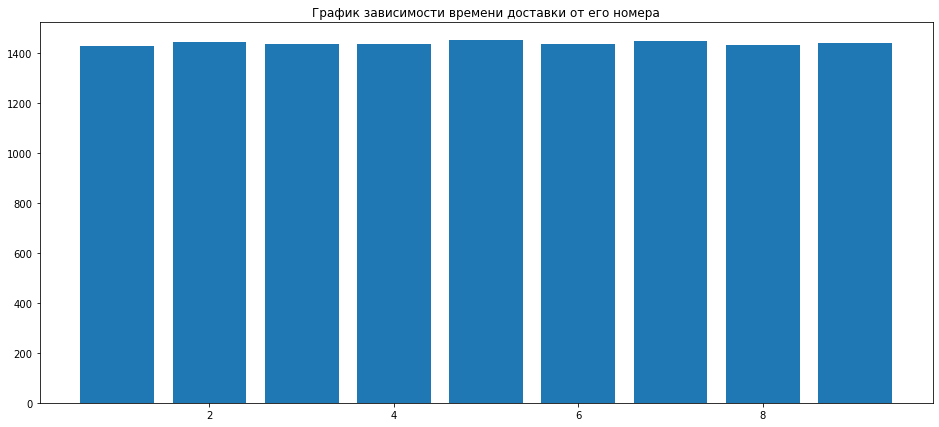

In [90]:
x = data_per.index
y = data_per.mean_time_delivery
plt.figure(figsize=(16, 7))
plt.bar(x,y)
plt.title('График зависимости времени доставки от его номера')
plt.show()


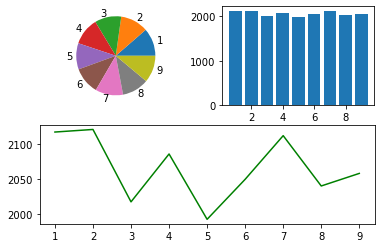

In [91]:
plt.subplot(212)
df2 = df1[['number','time']].groupby(by=['number']).max()
plt.plot( df2.index, df2['time'], color='green')

plt.subplot(221)
plt.pie(df2.time, labels= df2.index,)

plt.subplot(222)
plt.bar(df2.index, df2.time,)

plt.show()

In [92]:
#5 Кластеризация

l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

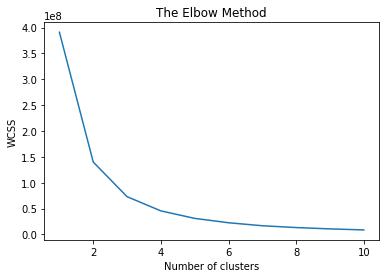

In [93]:
#две переменные для построения кластеризации
X=np.array([[a,b] for a,b in zip(df1['time'],df1['price'])])

#применим метод локтя
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

l:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


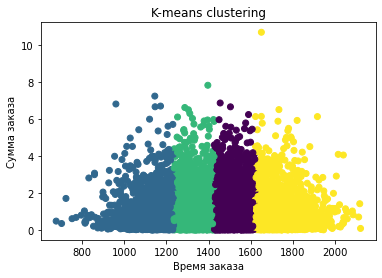

In [94]:
#Взял 4 кластера, по методу локтя
k_means = KMeans(n_clusters = 4)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.xlabel("Время заказа")
plt.ylabel("Сумма заказа")

plt.show()

In [95]:
#присваивание значений кластеров пользователям
df1['cluster_value'] = clusters
df1

,user-id,number,time,price,retention,mean_time_delivery,List,cluster_value
0,ge49g18d102gcgc59f198,5,1324.994587,2.038510,2,1450.444225,4-6,2
1,fg86cae79echc1i034hf6,1,1268.532556,1.859879,3,1427.453475,1-3,2
2,3fdb4e86g8acg1kk4i225,1,1521.241210,0.097210,2,1427.453475,1-3,0
3,i2bgck8e4dfgkg9ghdff2,4,1707.343809,0.651864,5,1434.151887,4-6,3
4,e3bi15c3f0gc50ah1836e,9,1658.876673,0.319246,1,1441.955896,7-9,3
...,...,...,...,...,...,...,...,...
9995,i80gdei98d36fd11gd9e6,3,1520.067263,0.187436,4,1436.039811,1-3,0
9996,4aihkd682gb25e4cahcfk,9,1438.301981,1.073724,4,1441.955896,7-9,0
9997,6a6ec25hgdkgkb4a8g5g5,2,1475.053611,0.157374,1,1444.034667,1-3,0
9998,h3dae146b6i4kg99gbkgd,1,1254.275170,3.017635,1,1427.453475,1-3,2


In [96]:
#6  сравниваем 2 кластера пользователей
first = df1[df1['cluster_value']==1]['price'].sum()/df1['price'].sum()
second = df1[df1['cluster_value']==2]['price'].sum()/df1['price'].sum()
titles = ["1","2"]

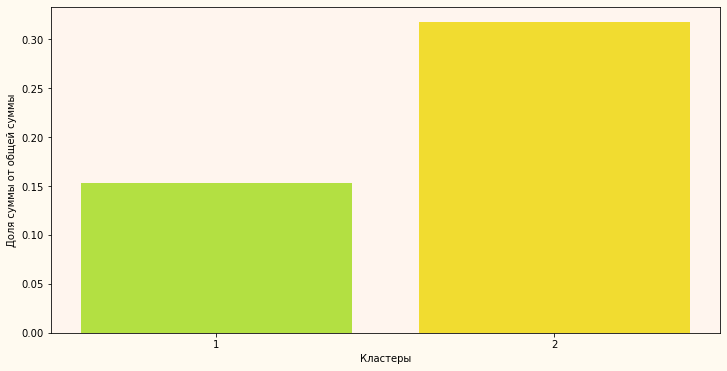

In [97]:
fig, ax = plt.subplots()

color_rectangle = np.random.rand(7, 3)
ax.bar(titles, [first,second], color = color_rectangle)

fig.set_figwidth(12)
fig.set_figheight(6)  
fig.set_facecolor('floralwhite')
plt.xlabel("Кластеры")
plt.ylabel("Доля суммы от общей суммы")
ax.set_facecolor('seashell')

plt.show()

Группа людей, относящаяся к первому кластеру тратит больше на заказы такси чем группа, которая относится ко второму кластеру